# Plot the land-surface temperature
Data files (netCDF) are obtained from IMPA-PT

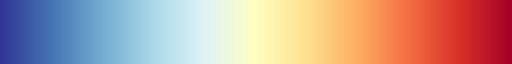

In [1]:
import sys
sys.path.insert(0, '..')
import os
import glob
from filament import filament
import datetime
import netCDF4
import cmocean
import logging
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cartopyticker
reload(filament)
plt.style.use("filament.mplstyle")
cmap = cmocean.cm.thermal
cmap = plt.cm.RdYlBu_r
cmap

In [2]:
logger = logging.getLogger("filamentPlot")
logger.setLevel(logging.INFO)
logging.info("Starting")
plotvis = 0

## Files and directories

In [6]:
regionname= "Canary"

datadir = f"/home/ctroupin/data/LST/{regionname}/"

figdir = f"../figures/LST/{regionname}/"
visibledir = "/data/Visible/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "NETCDF4*20250809*.nc")))

nfiles = len(datafilelist)

logger.info("Processing {} files".format(nfiles))
    
domain = filament.regions["canarydomain"]
myproj = ccrs.Mercator(central_longitude=0.5 * (domain[0] + domain[1]), min_latitude=domain[2], 
                       max_latitude=domain[3])

INFO:filamentPlot:Processing 1 files


## Loop on files and make plots

In [8]:
for lstfile in datafilelist[0:1]:
    
    with netCDF4.Dataset(lstfile) as nc:
        lon = nc.variables["lon"][:]
        lat = nc.variables["lat"][:]
        LST = nc.variables["LST-day"][:]
        thedate = netCDF4.num2date(nc.variables["time"][0], nc.variables["time"].units)
        thedatestring = thedate.strftime('%Y-%m-%d')
        
    fig = plt.figure(figsize=(12, 10))
    ax = plt.subplot(111, projection=myproj)
    #ax.set_extent([-18.5, -13.0, 27.5, 29.5])
    ax.set_extent([-15.9, -15.3, 27.7, 28.2])

    ax.set_title(f"Land surface temperature\n{thedatestring}", fontsize=24)

    iii = 0
    pcm = ax.pcolormesh(lon, lat, LST[0,:,:], cmap=cmap, vmin=25., vmax=45., 
                        transform=filament.datacrs, zorder=3)

    cb = plt.colorbar(pcm, extend="both", shrink=0.5)
    cb.set_label("°C", rotation=0, ha="left")

    iii = 0        
    #vis.add_to_plot(ax, myproj)

    ax.add_feature(filament.coast_f, linewidth=.2, color=".85", zorder=2)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=.5, color='.25', linestyle='--', zorder=2)
    gl.top_labels = False
    gl.right_labels = False

    figname = os.path.join(figdir, f"LST_GranCanaria_{thedate.strftime('%Y%m%d')}.jpg")
    plt.savefig(figname, dpi=300, bbox_inches="tight")
    #plt.show()
    plt.close(fig)